In [ ]:
#파일 다운
!wget https://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip ml-100k.zip

In [2]:
import torch
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt


In [3]:
#데이터 불러오기
train = pd.read_csv("ml-100k/ua.base",
 sep="\t", names=['user', 'item', 'rating', 'timestamp'])
test = pd.read_csv("ml-100k/ua.test",
 sep="\t", names=['user', 'item', 'rating', 'timestamp'])

In [6]:
#torch 데이터로 변환
items = torch.LongTensor(train['item'])
users = torch.LongTensor(train['user'])
ratings = torch.FloatTensor(train['rating'])
items_test = torch.LongTensor(test['item'])
users_test = torch.LongTensor(test['user'])
ratings_test = torch.FloatTensor(test['rating'])

epoch: 0, cost: 13.963217735290527, test_cost:11.089017868041992
epoch: 100, cost: 0.5070917010307312, test_cost:1.1178498268127441
epoch: 200, cost: 0.45880982279777527, test_cost:1.136626958847046
epoch: 300, cost: 0.4474954605102539, test_cost:1.168376088142395
epoch: 400, cost: 0.4439549446105957, test_cost:1.195642113685608
epoch: 500, cost: 0.44155651330947876, test_cost:1.2132972478866577
epoch: 600, cost: 0.4402010440826416, test_cost:1.219245433807373
epoch: 700, cost: 0.4395757019519806, test_cost:1.2213391065597534
epoch: 800, cost: 0.4393249452114105, test_cost:1.219879150390625
epoch: 900, cost: 0.439144104719162, test_cost:1.2164454460144043
epoch: 1000, cost: 0.43887820839881897, test_cost:1.2130793333053589


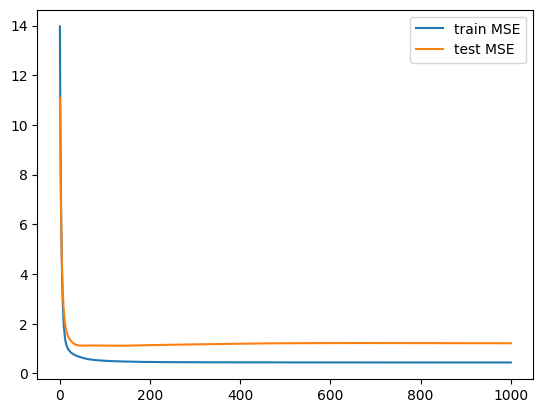

In [23]:
rank = 10
lambda1 = 0.1
lambda2 = 0.1
lambda3 = 0.1
lambda4 = 0.1


numItems = max(items) + 1
numUsers = max(users) + 1

mean = ratings.mean()

P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)
bias_user = torch.randn(numUsers, requires_grad=True)
bias_item = torch.randn(numItems, requires_grad=True)


mse = nn.MSELoss()

#optim = torch.optim.Adam([P,Q], lr = 0.1)
optim = torch.optim.Adam([P,Q,bias_user,bias_item], lr = 0.1)

x=[]
y=[]
y_test=[]


for epoch in range(1001):

  #h = (P[items] * Q[users]).sum(dim=1)
  h = (P[items] * Q[users]).sum(dim=1) + mean + bias_item[items] + bias_user[users]
  cost = mse(h, ratings)
  #cost_reg = cost + lambda1 * (P ** 2).mean() + lambda2 * (Q ** 2).mean()
  cost_reg = cost + lambda1 * (P ** 2).mean() + lambda2 * (Q ** 2).mean() + \
  lambda3 *(bias_item**2).mean() + lambda4 *(bias_user**2).mean()

  optim.zero_grad()
  cost_reg.backward()
  #cost.backward()
  optim.step()

  with torch.no_grad():
    x.append(epoch)
    y.append(cost.item())


    #h_test = (P[items_test]*Q[users_test]).sum(dim=1)
    h_test = (P[items_test]*Q[users_test]).sum(dim=1) + mean \
              + bias_item[items_test] + bias_user[users_test]
    cost_test = mse(h_test, ratings_test)

    y_test.append(cost_test.item())

    if epoch % 100 == 0:
      print(f"epoch: {epoch}, cost: {cost.item()}, test_cost:{cost_test}")

plt.plot(x,y,label="train MSE")
plt.plot(x,y_test,label="test MSE")
plt.legend()
plt.show()